In [9]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# データ準備

In [10]:
train = pd.read_csv('train.csv')

# 提出用にidを保持
ids = test['PassengerId']

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 棒グラフ

### 素人

In [7]:
p0 = train[train['Survived'] == 0].groupby('Pclass')['Survived'].count()
p0

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64

In [12]:
p1 = train[train['Survived'] == 1].groupby('Pclass')['Survived'].count()
p1

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [22]:
p0.index

Int64Index([1, 2, 3], dtype='int64', name='Pclass')

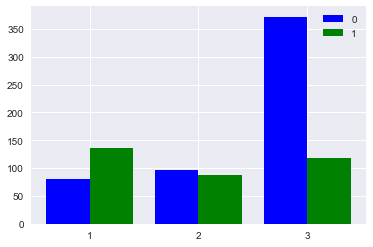

In [24]:
w = 0.4
left = p0.index
plt.bar(left, p0, color='b', width=w, label='0', align="center")
plt.bar(left + w, p1, color='g', width=w, label='1', align="center")

# 凡例を表示
plt.legend(loc="best")

# X軸の目盛りを書き換える
plt.xticks(left + w/2, left)

plt.show()

### プロ (seabornを使う人)

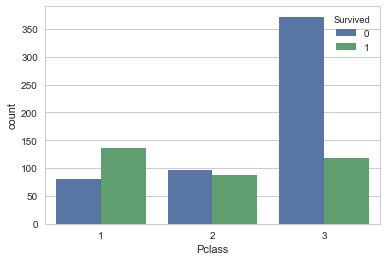

In [58]:
sns.countplot(x='Pclass',hue="Survived",data=train)

In [ ]:
その他プロっぽく

In [35]:
train_grpby = train.groupby(['Pclass'])
train_grpby.head()
train_grpby['Survived'].aggregate(sum)

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

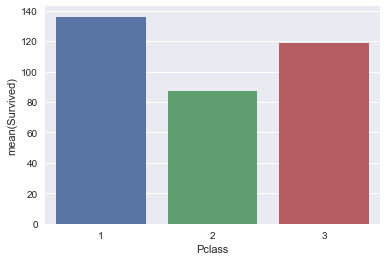

In [27]:
train_data_for_graph = train_grpby['Survived'].aggregate(sum).reset_index()
train_data_for_graph
sns.barplot(x='Pclass', y='Survived', data=train_data_for_graph)

* hueを抜いたらうまくいった。が、なぜか１３０？

### ぼつ2

In [17]:
train_grpby = train.groupby( ['Sex', 'Pclass'])
train_data_for_graph = train_grpby['Survived'].aggregate(sum).reset_index()
train_data_for_graph.head()

,Sex,Pclass,Survived
0,female,1,91
1,female,2,70
2,female,3,72
3,male,1,45
4,male,2,17


In [19]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


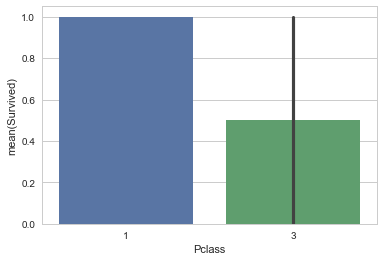

In [60]:
sns.barplot(x='Sex', y='Survived', hue= 'Pclass', data=train_data_for_graph)

## 棒グラフの意味。

> ある項目のデータを、長方形の図形を並べて表したグラフのことである。

> A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars. Bar plots include 0 in the quantitative axis range, and they are a good choice when 0 is a meaningful value for the quantitative variable, and you want to make comparisons against it.

> It is also important to keep in mind that a bar plot shows only the mean (or other estimator) value, but in many cases it may be more informative to show the distribution of values at each level of the categorical variables. In that case, other approaches such as a box or violin plot may be more appropriate.

In [ ]:
mean(平均値)しか表示しません。必要によって、boxplotやviolinplotを使ってください。

In [153]:
tips = sns.load_dataset("tips")
tips.groupby("day").count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [164]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [154]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


## 質問！！！！！！

In [74]:
tips.dtypes()

TypeError: 'Series' object is not callable

In [ ]:
tips = tips.drop(tips[tips.day == 'Fri'].index).reset_index()
tips
#tips.groupby('day').count()
#tips = tips[tips.day != 'Thur']


In [ ]:
tips.day

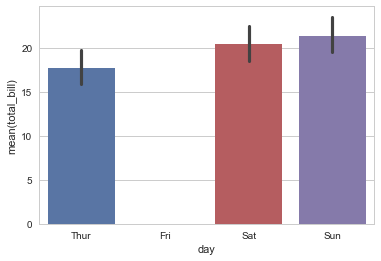

In [162]:
ax = sns.barplot(x='day', y="total_bill", data=tips)

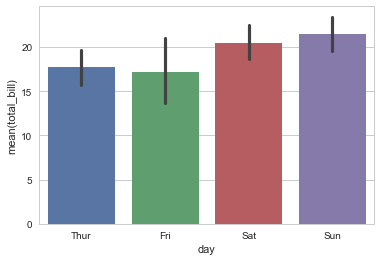

In [38]:
import seaborn as sns
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

In [ ]:
[Seaborn で件数や平均値を棒グラフで可視化する](http://pythondatascience.plavox.info/seaborn/%E6%A3%92%E3%82%B0%E3%83%A9%E3%83%95)
